In [1]:
%load_ext autoreload

%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import metrics

# from mlxtend.plotting import plot_decision_regions
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from ast import literal_eval

import warnings
import numpy as np
from collections import OrderedDict

from lob_data_utils import lob, db_result, model, roc_results
from lob_data_utils.svm_calculation import lob_svm
import os


sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

In [2]:
data_length = 10000
rs_params = [(0.1, 1.0), (1.0, 0.1), (1.0, 1.0), (0.1, 0.1)]
stocks = list(roc_results.result_cv_10000.keys())
data_dir = 'res_pca_gdf_que3'

In [3]:
def get_mean_scores(scores: dict) -> dict:
    mean_scores = {}
    for k, v in scores.items():
        mean_scores[k] = np.mean(v)
    return mean_scores

def get_score_for_clf(clf, df_test):
    x_test = df_test[['queue_imbalance']]
    y_test = df_test['mid_price_indicator'].values
    return model.test_model(clf, x_test, y_test)

def get_logistic_regression(stock, data_length):
    df, df_test = lob.load_prepared_data(
        stock, data_dir='../gaussian_filter/data', cv=False, length=data_length)
    clf = LogisticRegression()
    train_x = df[['queue_imbalance']]

    scores = model.validate_model(clf, train_x, df['mid_price_indicator'])
    res = {
        **get_mean_scores(scores),
        'stock': stock,
        'kernel': 'logistic',
    }
    test_scores = get_score_for_clf(clf, df_test)
    return {**res, **test_scores}

In [4]:
df_res = pd.DataFrame()
for stock in stocks:
    for r, s in rs_params:
    #pd.read_csv('svm_features_{}_len{}_r{}_s{}.csv'.format(stock, data_length, r, s))
        filename = data_dir + '/svm_pca_gdf_linear_{}_len{}_r{}_s{}.csv'.format(stock, data_length, r, s)
        if os.path.exists(filename):
            df_temp = pd.read_csv(filename)
            df_temp['r'] = [r] * len(df_temp)
            df_temp['s'] = [s] * len(df_temp)
            df_res = df_res.append(df_temp)
#df_res.drop(columns=['Unnamed: 0'], inplace=True)
columns = ['C', 'f1', 'features', 'gamma', 'kappa',
           'matthews', 'roc_auc', 'stock',
       'test_f1', 'test_kappa', 'test_matthews', 'test_roc_auc', 'r', 's']
df_res[columns].sort_values(by='matthews', ascending=False).groupby('stock').head(1)

,C,f1,features,gamma,kappa,matthews,roc_auc,stock,test_f1,test_kappa,test_matthews,test_roc_auc,r,s
5,100.000,0.597840,pca_gdf_que3,NaN,0.187122,0.189161,0.593434,11946,0.620493,0.197371,0.197449,0.598573,0.1,1.0
3,1.000,0.587571,pca_gdf_que3,NaN,0.175971,0.177467,0.588172,3879,0.556285,0.120489,0.120489,0.560245,0.1,1.0
2,0.100,0.590397,pca_gdf_que3,NaN,0.164895,0.165506,0.582445,3035,0.569645,0.102206,0.102252,0.551062,1.0,1.0
5,100.000,0.572933,pca_gdf_que3,NaN,0.162363,0.163634,0.581368,7858,0.529983,0.169190,0.171470,0.584001,0.1,1.0
3,1.000,0.613505,pca_gdf_que3,NaN,0.159534,0.160359,0.579670,4320,0.616659,0.161348,0.161785,0.580375,1.0,1.0
2,0.100,0.610424,pca_gdf_que3,NaN,0.157877,0.159300,0.578764,10484,0.563976,0.114663,0.115013,0.557432,1.0,0.1
6,1000.000,0.585950,pca_gdf_que3,NaN,0.155337,0.158113,0.577967,12417,0.589260,0.151430,0.152088,0.575803,1.0,0.1
6,1000.000,0.598820,pca_gdf_que3,NaN,0.151110,0.154998,0.575655,1956,0.587399,0.128917,0.129840,0.564485,1.0,1.0
1,0.010,0.580586,pca_gdf_que3,NaN,0.149908,0.152801,0.575124,1472,0.619130,0.109215,0.110728,0.553989,1.0,1.0
5,100.000,0.569866,pca_gdf_que3,NaN,0.149626,0.152584,0.575185,9761,0.603512,0.139930,0.141328,0.569842,0.1,1.0


In [5]:
log_res = []
for stock in stocks:
    log_res.append(get_logistic_regression(stock, data_length))
df_log_res = pd.DataFrame(log_res)
df_log_res['stock'] = df_log_res['stock'].values.astype(np.int)
df_log_res.index = df_log_res['stock'].values.astype(np.int)

In [6]:
df_gdf_best = df_res[columns].sort_values(by='matthews', ascending=False).groupby('stock').head(1)
df_gdf_best['stock'] = df_gdf_best['stock'].values.astype(np.int)
df_gdf_best.index = df_gdf_best['stock'].values.astype(np.int)

In [7]:
df_all = pd.merge(df_gdf_best, df_log_res, on='stock', suffixes=['_svm', '_log'])

In [8]:
all_columns = ['matthews_svm', 'matthews_log',  'test_matthews_svm',  'test_matthews_log', 
       'roc_auc_svm', 'roc_auc_log', 'test_roc_auc_svm',  'test_roc_auc_log', 'stock' ]
df_all[all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.189161,0.186824,0.197449,0.203627,0.593434,0.592373,0.598573,0.601087,11946
1,0.177467,0.178656,0.120489,0.120812,0.588172,0.588843,0.560245,0.560288,3879
2,0.165506,0.167115,0.102252,0.099310,0.582445,0.583085,0.551062,0.549537,3035
3,0.163634,0.146384,0.171470,0.171235,0.581368,0.572852,0.584001,0.584512,7858
4,0.160359,0.156657,0.161785,0.163789,0.579670,0.577752,0.580375,0.581178,4320
5,0.159300,0.158982,0.115013,0.103611,0.578764,0.578350,0.557432,0.551208,10484
6,0.158113,0.150172,0.152088,0.154446,0.577967,0.573432,0.575803,0.576707,12417
7,0.154998,0.152838,0.129840,0.133788,0.575655,0.574598,0.564485,0.566273,1956
8,0.152801,0.148600,0.110728,0.118223,0.575124,0.572888,0.553989,0.557251,1472
9,0.152584,0.144700,0.141328,0.132214,0.575185,0.571695,0.569842,0.564652,9761


In [9]:
df_all['matthews_diff'] = df_all['matthews_svm'] -  df_all['matthews_log']
df_all['matthews_test_diff'] = df_all['test_matthews_svm'] - df_all['test_matthews_log']

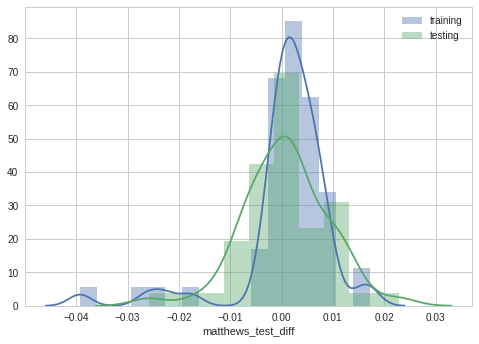

In [10]:
sns.distplot(df_all['matthews_diff'], label='training')
sns.distplot(df_all['matthews_test_diff'], label='testing')
plt.legend()

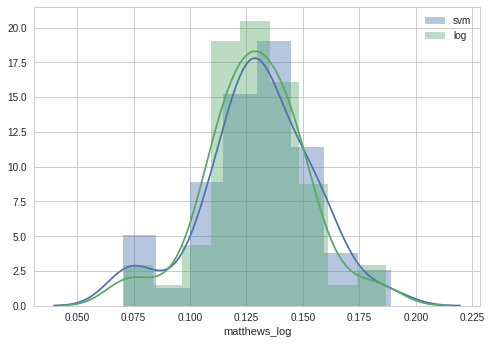

In [11]:
sns.distplot(df_all['matthews_svm'], label='svm')
sns.distplot(df_all['matthews_log'], label='log')
plt.legend()

In [12]:
df_all['matthews_diff'].sum(), df_all['matthews_test_diff'].sum()

(0.05038949277180438, 0.03909973003932626)

In [13]:
len(df_all[df_all['matthews_svm'] > df_all['matthews_log']][all_columns]), len(df_all[df_all['test_matthews_svm'] > df_all['test_matthews_log']]), len(df_all)

(39, 30, 53)

In [14]:
df_all[df_all['test_matthews_svm'] < df_all['test_matthews_log']][all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.189161,0.186824,0.197449,0.203627,0.593434,0.592373,0.598573,0.601087,11946
1,0.177467,0.178656,0.120489,0.120812,0.588172,0.588843,0.560245,0.560288,3879
4,0.160359,0.156657,0.161785,0.163789,0.579670,0.577752,0.580375,0.581178,4320
6,0.158113,0.150172,0.152088,0.154446,0.577967,0.573432,0.575803,0.576707,12417
7,0.154998,0.152838,0.129840,0.133788,0.575655,0.574598,0.564485,0.566273,1956
8,0.152801,0.148600,0.110728,0.118223,0.575124,0.572888,0.553989,0.557251,1472
10,0.149095,0.145601,0.145861,0.153016,0.573893,0.572127,0.572659,0.576301,11869
12,0.148009,0.142170,0.122977,0.130087,0.573311,0.570308,0.559462,0.562736,12255
13,0.146339,0.142499,0.161547,0.162155,0.572685,0.570582,0.580617,0.580693,10508
16,0.141151,0.131165,0.121799,0.122536,0.570161,0.564884,0.559944,0.558425,8080


In [15]:
len(df_all[df_all['roc_auc_svm'] > df_all['roc_auc_log']][all_columns]), len(df_all[df_all['test_roc_auc_svm'] > df_all['test_roc_auc_log']][all_columns]), len(df_all)

(39, 31, 53)

In [16]:
df_all[df_all['test_matthews_svm'] < df_all['test_matthews_log']][all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.189161,0.186824,0.197449,0.203627,0.593434,0.592373,0.598573,0.601087,11946
1,0.177467,0.178656,0.120489,0.120812,0.588172,0.588843,0.560245,0.560288,3879
4,0.160359,0.156657,0.161785,0.163789,0.579670,0.577752,0.580375,0.581178,4320
6,0.158113,0.150172,0.152088,0.154446,0.577967,0.573432,0.575803,0.576707,12417
7,0.154998,0.152838,0.129840,0.133788,0.575655,0.574598,0.564485,0.566273,1956
8,0.152801,0.148600,0.110728,0.118223,0.575124,0.572888,0.553989,0.557251,1472
10,0.149095,0.145601,0.145861,0.153016,0.573893,0.572127,0.572659,0.576301,11869
12,0.148009,0.142170,0.122977,0.130087,0.573311,0.570308,0.559462,0.562736,12255
13,0.146339,0.142499,0.161547,0.162155,0.572685,0.570582,0.580617,0.580693,10508
16,0.141151,0.131165,0.121799,0.122536,0.570161,0.564884,0.559944,0.558425,8080


In [17]:
df_all[df_all['test_roc_auc_svm'] < df_all['test_roc_auc_log']][all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.189161,0.186824,0.197449,0.203627,0.593434,0.592373,0.598573,0.601087,11946
1,0.177467,0.178656,0.120489,0.120812,0.588172,0.588843,0.560245,0.560288,3879
3,0.163634,0.146384,0.171470,0.171235,0.581368,0.572852,0.584001,0.584512,7858
4,0.160359,0.156657,0.161785,0.163789,0.579670,0.577752,0.580375,0.581178,4320
6,0.158113,0.150172,0.152088,0.154446,0.577967,0.573432,0.575803,0.576707,12417
7,0.154998,0.152838,0.129840,0.133788,0.575655,0.574598,0.564485,0.566273,1956
8,0.152801,0.148600,0.110728,0.118223,0.575124,0.572888,0.553989,0.557251,1472
10,0.149095,0.145601,0.145861,0.153016,0.573893,0.572127,0.572659,0.576301,11869
12,0.148009,0.142170,0.122977,0.130087,0.573311,0.570308,0.559462,0.562736,12255
13,0.146339,0.142499,0.161547,0.162155,0.572685,0.570582,0.580617,0.580693,10508
